# overall rainfall

In [8]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%config InlineBackend.figure_format = 'retina'
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.size'] = 24
#mpl.rc('xtick', labelsize=20) 
#mpl.rc('ytick', labelsize=20) 

import matplotlib.dates as mdates


from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [9]:
rain = pd.read_csv('date_rain_prism.csv')
rain['Date'] =  pd.to_datetime(rain['Date'])
rain.head()

,Date,ppt (mm)
0,1981-01-01,1.01
1,1981-01-02,0.00
2,1981-01-03,1.13
3,1981-01-04,2.11
4,1981-01-05,0.00


In [10]:
rain_dateindex = rain.set_index('Date')

In [15]:
rain_yearly = rain_dateindex.resample('Y').sum()
rain_yearly.tail()

,ppt (mm)
Date,
2015-12-31,257.85
2016-12-31,555.36
2017-12-31,684.79
2018-12-31,399.82
2019-12-31,619.48


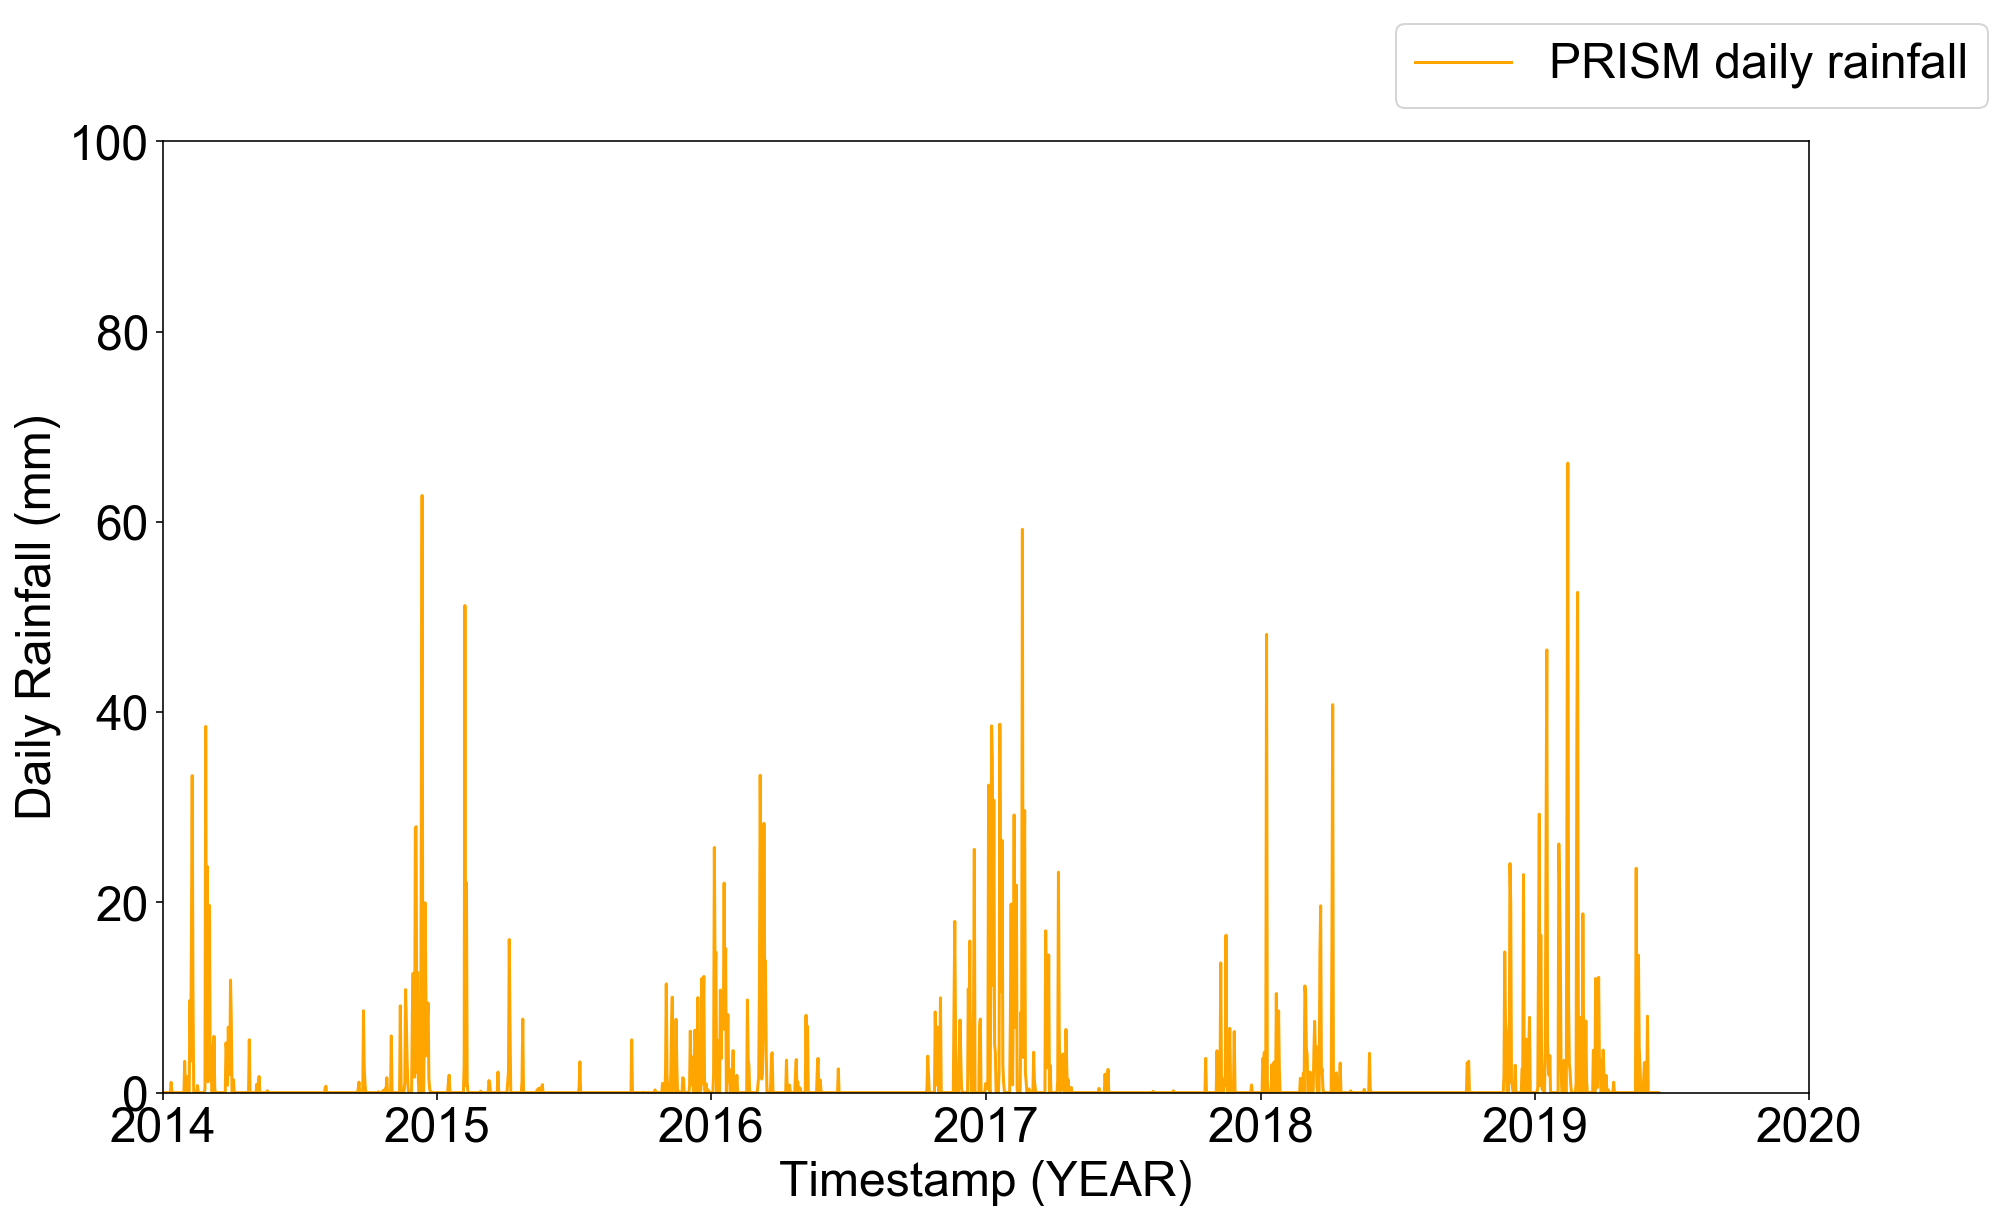

In [25]:
year = mdates.YearLocator()   # every year
year_fmt = mdates.DateFormatter('%Y')

locator = mdates.AutoDateLocator(minticks=3, maxticks=12)
#formatter = mdates.ConciseDateFormatter(locator)


fig = plt.figure()
ax = fig.add_subplot(111)
#ax1 = ax.twinx()

ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt)

ax.plot(rain_dateindex.loc['1981':'2019','ppt (mm)'], color='orange', label='PRISM daily rainfall')
#ax1.scatter(rain_yearly.loc['1981-12-31':'2019-12-31'].values, rain_yearly['ppt (mm)'], color='green', label='PRISM yearly rainfall')
#ax1.plot(rain_yearly.loc['1981-12-31':'2019-12-31'], color='green', marker='o', lw=0.5, label='PRISM yearly rainfall')

ax.set_xlabel('Timestamp (YEAR)')
ax.set_ylabel('Daily Rainfall (mm)')
#ax1.set_ylabel('Yearly Rainfall (mm)')

ax.set_xlim('2014','2020')
ax.set_ylim(0,100)
#ax1.set_ylim(0,1500)

#major ticks
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

#ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(year_fmt)

#ax.xaxis.set_major_formatter(formatter)

ax1.yaxis.set_major_locator(MultipleLocator(500))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%d'))

#minor ticks
#ax.yaxis.set_minor_locator(MultipleLocator(5))
#ax.yaxis.set_minor_locator(hours)

fig.legend()

fig = plt.gcf()
fig.set_size_inches(14.75, 8.75)
fig.savefig('figures/5_yr_historical_rainfall.pdf', bbox_inches='tight')